# Perceptron

In [4]:
from random import randint

def z(X,W,b):
	#Fonction d'agrégation
	somme = sum(X[i]*W[i] for i in range(len(X)))
	return somme + b

def phi(z):
	return 0 if z <= 0 else 1

def perceptron(D, alpha) :
	b = 1
	n = len(D[0][0])
	# W = [randint(0,10)/10 for i in range(n)]
	W = [0 for i in range(n)]
	print(f"W = {W}\n")
	for (X, y) in D :
		print(f"X = {X}, y = {y}")
		Z = z(X,W,b)
		print(f"Z = {Z}")
		t = phi(Z)
		print(f"t = {t}")

		nb = 0
		while (t != y) :
			nb += 1
			grad = y-t
			for i in range(len(W)) :
				W[i] = W[i] + alpha*grad*X[i]

			Z = z(X,W,b)
			t = phi(Z)
			print(f"{nb} : z = {Z}, t = {t}")

		print(f"Reussi pour {nb} changement\n")
	print(f"Biais finaux : {W}")


D = [
		((0.5, 2), 1),
		((1.1, 2.1), 1),
		((0.7, 2.6), 1),
		((2, 1), 0),
		((2.5, 0.7), 0),
		((2.2, 0.3), 0)
	]

alpha = 1
perceptron(D, alpha)

W = [0, 0]

X = (0.5, 2), y = 1
Z = 1.0
t = 1
Reussi pour 0 changement

X = (1.1, 2.1), y = 1
Z = 1.0
t = 1
Reussi pour 0 changement

X = (0.7, 2.6), y = 1
Z = 1.0
t = 1
Reussi pour 0 changement

X = (2, 1), y = 0
Z = 1
t = 1
1 : z = -4, t = 0
Reussi pour 1 changement

X = (2.5, 0.7), y = 0
Z = -4.7
t = 0
Reussi pour 0 changement

X = (2.2, 0.3), y = 0
Z = -3.7
t = 0
Reussi pour 0 changement

Biais finaux : [-2, -1]


In [17]:
import torch

dtype = torch.float
device = torch.device("cpu")

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000, 1, 10, 1

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = 3*x+2

# 0) Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
b = torch.randn(1, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-5
for t in range(10001):
    # 1) Forward pass: compute predicted y
    z = x.mm(w1)+b.repeat(N,1)
    z_relu = z.clamp(min=0)
    y_pred = z_relu.mm(w2)

    # 2) Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 500 == 0:
         print(t, loss)

    # 3) Backpropagate to compute gradients of w1, w2 and b with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = z_relu.t().mm(grad_y_pred)


    grad_z_relu = grad_y_pred.mm(w2.t())
    grad_z = grad_z_relu.clone()
    grad_z[z < 0] = 0
    grad_w1 = x.t().mm(grad_z)

    grad_b = grad_z.sum(0)

    # 4) Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b -= learning_rate * grad_b

0 4649.5048828125
500 56.359718322753906
1000 15.738125801086426
1500 7.682308197021484
2000 4.388155460357666
2500 2.718217134475708
3000 1.7791625261306763
3500 1.1901214122772217
4000 0.8197910785675049
4500 0.5843839645385742
5000 0.433859646320343
5500 0.3322492837905884
6000 0.26192396879196167
6500 0.21188227832317352
7000 0.17532382905483246
7500 0.14792199432849884
8000 0.12626950442790985
8500 0.10895420610904694
9000 0.09463966637849808
9500 0.08261455595493317
10000 0.07240623235702515


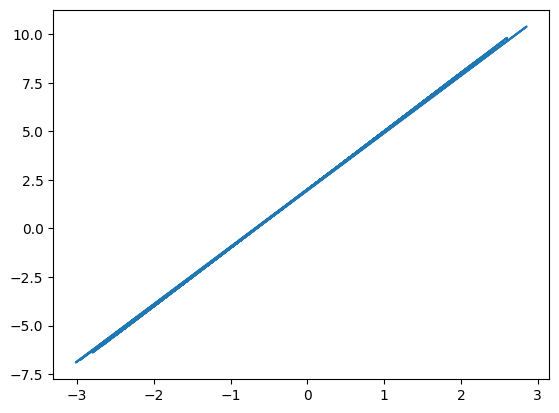

tensor([[0.0000, 2.0000, 2.0006],
        [0.0526, 2.1579, 2.1586],
        [0.1053, 2.3158, 2.3166],
        [0.1579, 2.4737, 2.4746],
        [0.2105, 2.6316, 2.6326],
        [0.2632, 2.7895, 2.7906],
        [0.3158, 2.9474, 2.9486],
        [0.3684, 3.1053, 3.1066],
        [0.4211, 3.2632, 3.2646],
        [0.4737, 3.4211, 3.4226],
        [0.5263, 3.5789, 3.5806],
        [0.5789, 3.7368, 3.7341],
        [0.6316, 3.8947, 3.8923],
        [0.6842, 4.0526, 4.0505],
        [0.7368, 4.2105, 4.2086],
        [0.7895, 4.3684, 4.3668],
        [0.8421, 4.5263, 4.5250],
        [0.8947, 4.6842, 4.6831],
        [0.9474, 4.8421, 4.8413],
        [1.0000, 5.0000, 4.9995]])


In [19]:
import matplotlib.pyplot as plt

# 5) Examining the learnt function
M = 20
x_test = torch.linspace(0,1,M).unsqueeze(1)
x_test = x_test.repeat(1,D_in)

z_test = x_test.mm(w1)+b.repeat(M,1)
z_relu_test = z_test.clamp(min=0)
y_pred_test = z_relu_test.mm(w2)

plt.plot(list(x[:,0]), list(y_pred[:,0]))
plt.show()

y_test = 3*x_test + 2

print(torch.cat((x_test,y_test,y_pred_test), 1))